In [1]:
import requests
import torch
from io import BytesIO
def get_s3_state_dict(s3_url):
    response = requests.get(s3_url, stream=True)
    bio = BytesIO(response.content)
    state_dict = torch.load(bio)
    return state_dict
#     model.load_state_dict(loaded["model"])

# s3_url = "https://uberduck-models.s3.us-west-1.amazonaws.com/radtts++ljs-dap.pt"
s3_url = "https://uberduck-models-us-west-2.s3.us-west-2.amazonaws.com/radtts%2B%2Bljs-dap.pt"
pretrained_dict = get_s3_state_dict(s3_url)['state_dict']


In [3]:
import os
os.chdir('/home/ray/default')
from uberduck_ml_dev.models.radtts import RADTTS
from uberduck_ml_dev.exec.train_radtts_with_ray import model_config

include_layers = []
ignore_layers_warmstart = []
# "warmstart"
model = RADTTS(
    **model_config,
)

if len(include_layers):
    pretrained_dict = {k: v for k, v in pretrained_dict.items()
                       if any(l in k for l in include_layers)}

if len(ignore_layers_warmstart):
    pretrained_dict = {k: v for k, v in pretrained_dict.items()
                       if all(l not in k for l in ignore_layers_warmstart)}

model_dict = model.state_dict()
model_dict.update(pretrained_dict)
model.load_state_dict(model_dict, strict=False)
model = model.cuda()
# print("Warm started from {}".format(checkpoint_path))
# model.load_state_dict(state_dict['state_dict'])

Applying spectral norm to text encoder LSTM
Applying spectral norm to context encoder LSTM


/home/ray/default/uberduck_ml_dev/models/common.py:1516: UserWarning: torch.qr is deprecated in favor of torch.linalg.qr and will be removed in a future PyTorch release.
The boolean parameter 'some' has been replaced with a string parameter 'mode'.
Q, R = torch.qr(A, some)
should be replaced with
Q, R = torch.linalg.qr(A, 'reduced' if some else 'complete') (Triggered internally at ../aten/src/ATen/native/BatchLinearAlgebra.cpp:2349.)
  W = torch.qr(torch.FloatTensor(c, c).normal_())[0]
/home/ray/anaconda3/lib/python3.10/site-packages/torch/functional.py:1682: UserWarning: torch.lu is deprecated in favor of torch.linalg.lu_factor / torch.linalg.lu_factor_ex and will be removed in a future PyTorch release.
LU, pivots = torch.lu(A, compute_pivots)
should be replaced with
LU, pivots = torch.linalg.lu_factor(A, compute_pivots)
and
LU, pivots, info = torch.lu(A, compute_pivots, get_infos=True)
should be replaced with
LU, pivots, info = torch.linalg.lu_factor_ex(A, compute_pivots) (Triggered 

In [4]:
from uberduck_ml_dev.exec.train_radtts_with_ray import get_ray_dataset
ray_dataset = get_ray_dataset()
batch = ray_dataset.take(6)

2023-03-08 17:30:39,491	INFO worker.py:1360 -- Connecting to existing Ray cluster at address: 10.0.38.167:6379...
2023-03-08 17:30:39,502	INFO worker.py:1548 -- Connected to Ray cluster. View the dashboard at https://console.anyscale.com/api/v2/sessions/ses_ha6my3r3kl4mn9jdylcqnfutq1/services?redirect_to=dashboard 
2023-03-08 17:30:39,558	INFO packaging.py:330 -- Pushing file package 'gcs://_ray_pkg_cc6c57beec5bd996cace42864eba9f20.zip' (20.65MiB) to Ray cluster...
2023-03-08 17:30:39,909	INFO packaging.py:343 -- Successfully pushed file package 'gcs://_ray_pkg_cc6c57beec5bd996cace42864eba9f20.zip'.
(_get_read_tasks pid=144149) 2023-03-08 17:30:41,724	WARNING file_meta_provider.py:162 -- Expanding 100 path(s). This may be a HIGH LATENCY operation on some cloud storage services. If the specified paths all point to files and never directories, try rerunning this read with `meta_provider=FastFileMetadataProvider()`.
2023-03-08 17:30:42,911	INFO bulk_executor.py:41 -- Executing DAG InputDa

(autoscaler +32s) Tip: use `ray status` to view detailed cluster status. To disable these messages, set RAY_SCHEDULER_EVENTS=0.
(autoscaler +32s) Adding 7 node(s) of type worker-node-type-0.


MapBatches(<lambda>): 100%|██████████| 100/100 [00:00<00:00, 415.71it/s]
2023-03-08 17:31:01,313	WARNING plan.py:528 -- Warning: The Ray cluster currently does not have any available CPUs. The Dataset job will hang unless more CPUs are freed up. A common reason is that cluster resources are used by Actors or Tune trials; see the following link for more details: https://docs.ray.io/en/master/data/dataset-internals.html#datasets-and-tune
2023-03-08 17:31:01,314	INFO bulk_executor.py:41 -- Executing DAG InputDataBuffer[Input] -> TaskPoolMapOperator[MapBatches(<lambda>)]
MapBatches(<lambda>): 100%|██████████| 100/100 [00:00<00:00, 737.48it/s]
2023-03-08 17:31:01,766	INFO bulk_executor.py:41 -- Executing DAG InputDataBuffer[Input] -> TaskPoolMapOperator[MapBatches(<lambda>)]
MapBatches(<lambda>): 100%|██████████| 100/100 [00:01<00:00, 83.25it/s]


In [5]:
from uberduck_ml_dev.exec.train_radtts_with_ray import ray_df_to_batch_radtts, get_text

In [1]:
get_text('your mom')
# tensor([  8,  99,  89,  95,  92,   8, 155, 103, 155,   8])


NameError: name 'get_text' is not defined

In [13]:
batch_dict = ray_df_to_batch_radtts(next(ray_dataset.iter_batches(batch_size=6)))

/home/ray/default/uberduck_ml_dev/exec/train_radtts_with_ray.py:504: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:199.)
  audio = torch.FloatTensor(wav_data)


(autoscaler +2m44s) Adding 4 node(s) of type worker-node-type-0.


In [ ]:
from uberduck_ml_dev.utils.utils import (
    to_gpu,
)
binarize = False

In [ ]:
mel = to_gpu(batch_dict['mel'])
speaker_ids = to_gpu(batch_dict['speaker_ids'])
attn_prior = to_gpu(batch_dict['attn_prior'])
f0 = to_gpu(batch_dict['f0'])
voiced_mask = to_gpu(batch_dict['voiced_mask'])
p_voiced = to_gpu(batch_dict['p_voiced'])
text = to_gpu(batch_dict['text'])
in_lens = to_gpu(batch_dict['input_lengths'])
out_lens = to_gpu(batch_dict['output_lengths'])
energy_avg = to_gpu(batch_dict['energy_avg'])

with torch.no_grad():
    outputs = model(
                mel, speaker_ids, text, in_lens, out_lens,
                binarize_attention=binarize, attn_prior=attn_prior,
                f0=f0, energy_avg=energy_avg,
                voiced_mask=voiced_mask, p_voiced=p_voiced)

In [9]:
import os
os.chdir('uberduck_ml_dev')

In [42]:
import IPython.display as ipd
from scipy.io.wavfile import read
import numpy as np
# ipd.Audio('../crust.wav')
audio = read('../crust.wav')[1]
audio_norm = (max_wav_value - 1) * audio / (np.abs(audio).max())

audio_norm = torch.FloatTensor(audio_norm)
audio_norm = audio_norm.unsqueeze(0)
audio_norm = torch.autograd.Variable(audio_norm, requires_grad=False)
melspec = stft.mel_spectrogram(audio_norm)
melspec = torch.squeeze(melspec, 0)

In [43]:
audio_norm

array([ 9.99938963e-01,  9.99572741e-01,  9.99755852e-01, ...,
       -2.44148076e-04, -1.83111057e-04,  9.99633778e-01])

In [11]:
from uberduck_ml_dev.exec.train_radtts_with_ray import data_config
data_config['max_wav_value']

32768.0

In [12]:
from uberduck_ml_dev.data.audio_processing import TacotronSTFT
stft = TacotronSTFT(
    filter_length=data_config['filter_length'],
    hop_length=data_config['hop_length'],
    win_length=data_config['win_length'],
    sampling_rate=22050,
    n_mel_channels=data_config['n_mel_channels'],
    mel_fmin=data_config['mel_fmin'],
    mel_fmax=data_config['mel_fmax'],
)

In [27]:
from uberduck_ml_dev.models.common import get_mel
mel = get_mel(torch.FloatTensor(audio_norm), data_config['max_wav_value'], stft)

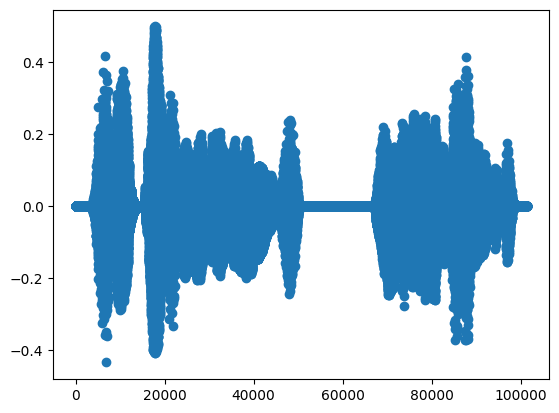

In [18]:
import matplotlib.pyplot as plt
plt.scatter( list(range(audio_norm.shape[0])) , torch.FloatTensor(audio_norm))

In [41]:
audio_norm

tensor([[ 3., 15.,  9.,  ...,  8.,  6., 13.]])

In [44]:

# audio_norm = torch.FloatTensor(audio) / max_wav_value


<Axes: >

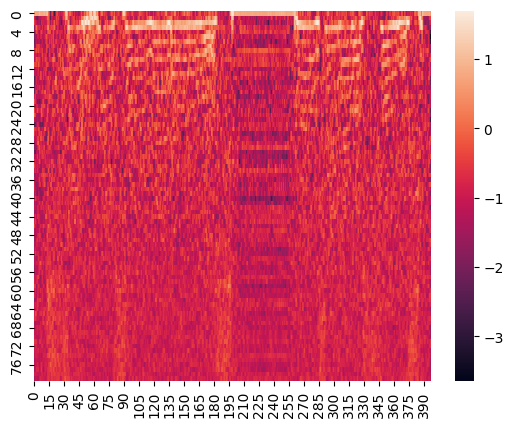

(autoscaler +32m19s) Adding 1 node(s) of type worker-node-type-1.
(autoscaler +33m24s) Resized to 12 CPUs, 2 GPUs.


(raylet, ip=10.0.43.220) /home/ray/anaconda3/lib/python3.10/site-packages/ray/dashboard/agent.py:51: DeprecationWarning: There is no current event loop
(raylet, ip=10.0.43.220)   aiogrpc.init_grpc_aio()


(autoscaler +33m54s) Adding 1 node(s) of type worker-node-type-0.


(raylet, ip=10.0.61.205) /home/ray/anaconda3/lib/python3.10/site-packages/ray/dashboard/agent.py:51: DeprecationWarning: There is no current event loop
(raylet, ip=10.0.61.205)   aiogrpc.init_grpc_aio()


(autoscaler +34m50s) Resized to 28 CPUs, 2 GPUs.
(autoscaler +39m51s) Removing 1 nodes of type worker-node-type-0 (idle).
(autoscaler +39m56s) Removing 1 nodes of type worker-node-type-0 (idle).
(autoscaler +40m1s) Removing 1 nodes of type worker-node-type-0 (idle).
(autoscaler +40m7s) Removing 1 nodes of type worker-node-type-0 (idle).
(autoscaler +40m12s) Removing 1 nodes of type worker-node-type-0 (idle).
(autoscaler +40m17s) Removing 1 nodes of type worker-node-type-0 (idle).
(autoscaler +40m22s) Removing 1 nodes of type worker-node-type-0 (idle).
(autoscaler +40m27s) Removing 1 nodes of type worker-node-type-0 (idle).
(autoscaler +40m32s) Removing 1 nodes of type worker-node-type-0 (idle).
(autoscaler +40m37s) Removing 1 nodes of type worker-node-type-0 (idle).
(autoscaler +40m41s) Removing 1 nodes of type worker-node-type-0 (idle).
(autoscaler +40m46s) Removing 1 nodes of type worker-node-type-0 (idle).
(autoscaler +40m51s) Removing 1 nodes of type worker-node-type-0 (idle).
(aut

In [45]:
%matplotlib inline
import seaborn as sns
sns.heatmap(melspec[:,:])

<Axes: >

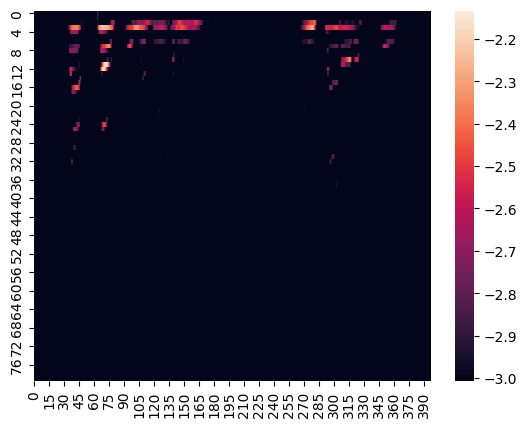

In [28]:
%matplotlib inline
import seaborn as sns
sns.heatmap(mel[:,:])

In [19]:
print(outputs)

{'z_mel': tensor([[[  5.5805,  -4.8502,  -2.2255,  ...,   0.6527,   0.6527,   0.6527],
         [  2.7833,  -6.4030,  -4.0849,  ...,  -0.4161,  -0.4161,  -0.4161],
         [ -1.9953,  -1.0113,   8.4573,  ...,  -0.3643,  -0.3643,  -0.3643],
         ...,
         [ 11.3995,  38.7243,   5.4153,  ...,  -0.2779,  -0.2779,  -0.2779],
         [ 41.7488,  13.7454,  -3.9335,  ...,  -3.4180,  -3.4180,  -3.4180],
         [ 59.0797, -18.6579,   6.7718,  ...,   7.4148,   7.4148,   7.4148]],

        [[  4.7221,  -4.2680,  -1.5898,  ...,   0.6527,   0.6527,   0.6527],
         [  2.8044,  -6.3878,  -4.9030,  ...,  -0.4161,  -0.4161,  -0.4161],
         [ -1.9617,  -1.7570,   9.0913,  ...,  -0.3643,  -0.3643,  -0.3643],
         ...,
         [ 14.3625,  39.4538,  10.2159,  ...,  -0.2779,  -0.2779,  -0.2779],
         [ 48.7296,  24.3077,  11.8530,  ...,  -3.4180,  -3.4180,  -3.4180],
         [ 47.3953,  -7.5014,   2.8491,  ...,   7.4148,   7.4148,   7.4148]],

        [[  5.7174,  -4.4648,  -2.

In [1]:
from uberduck_ml_dev.exec.train_radtts_with_ray import get_ray_dataset, train_func, train_config, model_config
from ray.train.torch import TorchTrainer, TorchCheckpoint, TorchTrainer
from ray.air.config import ScalingConfig, RunConfig
from ray.tune import SyncConfig

class TorchCheckpointFixed(TorchCheckpoint):
    def __setstate__(self, state: dict):
        if "_data_dict" in state and state["_data_dict"]:
            state = state.copy()
            state["_data_dict"] = self._decode_data_dict(state["_data_dict"])
        super(TorchCheckpoint, self).__setstate__(state)


# result = trainer.fit()

In [2]:
from ray.air.integrations.wandb import  setup_wandb

In [3]:
ray_dataset = get_ray_dataset()

2023-03-08 14:27:33,779	INFO worker.py:1360 -- Connecting to existing Ray cluster at address: 10.0.38.167:6379...
2023-03-08 14:27:33,828	INFO worker.py:1548 -- Connected to Ray cluster. View the dashboard at https://console.anyscale.com/api/v2/sessions/ses_ha6my3r3kl4mn9jdylcqnfutq1/services?redirect_to=dashboard 
2023-03-08 14:27:34,150	INFO packaging.py:330 -- Pushing file package 'gcs://_ray_pkg_78efb00b2d4bf87cf2071ad4d319358d.zip' (7.03MiB) to Ray cluster...
2023-03-08 14:27:34,245	INFO packaging.py:343 -- Successfully pushed file package 'gcs://_ray_pkg_78efb00b2d4bf87cf2071ad4d319358d.zip'.
(_get_read_tasks pid=25299) 2023-03-08 14:27:35,903	WARNING file_meta_provider.py:162 -- Expanding 100 path(s). This may be a HIGH LATENCY operation on some cloud storage services. If the specified paths all point to files and never directories, try rerunning this read with `meta_provider=FastFileMetadataProvider()`.


In [4]:

train_config['n_group_size'] = model_config['n_group_size']
train_config['dur_model_config'] = model_config['dur_model_config']
train_config['f0_model_config'] = model_config['f0_model_config']
train_config['energy_model_config'] = model_config['energy_model_config']
train_config['v_model_config']=model_config['v_model_config']

trainer = TorchTrainer(
    train_loop_per_worker=train_func,
    train_loop_config=train_config,
    scaling_config=ScalingConfig(
        num_workers=2, use_gpu=True, resources_per_worker=dict(CPU=4, GPU=1)
    ),
    run_config=RunConfig(
        sync_config=SyncConfig(upload_dir="s3://uberduck-anyscale-data/checkpoints")
    ),
    datasets={"train": ray_dataset},
)


In [5]:
config = train_config
setup_wandb(config, project="radtts-ray", rank_zero_only=False)

2023-03-07 16:35:52,269	WARNING session.py:100 -- In neither tune session nor train session!
/home/ray/anaconda3/lib/python3.10/site-packages/ray/air/session.py:28: UserWarning: `get_trial_id` is meant to only be called inside a function that is executed by a Tuner or Trainer. Returning `None`.
  warnings.warn(
2023-03-07 16:35:52,271	WARNING session.py:100 -- In neither tune session nor train session!
/home/ray/anaconda3/lib/python3.10/site-packages/ray/air/session.py:28: UserWarning: `get_trial_name` is meant to only be called inside a function that is executed by a Tuner or Trainer. Returning `None`.
  warnings.warn(
2023-03-07 16:35:52,272	WARNING session.py:100 -- In neither tune session nor train session!
/home/ray/anaconda3/lib/python3.10/site-packages/ray/air/session.py:28: UserWarning: `get_experiment_name` is meant to only be called inside a function that is executed by a Tuner or Trainer. Returning `None`.
  warnings.warn(
wandb: Currently logged in as: uberduck. Use `wandb 

In [8]:
import torch

print("CUDA AVAILABLE: ", torch.cuda.is_available())
epochs = config["epochs"]
batch_size = config["batch_size"]
steps_per_sample = config["steps_per_sample"]
# gin_channels = config["gin_channels"]
sigma = config['sigma']
kl_loss_start_iter = config['kl_loss_start_iter']
binarization_start_iter = config['binarization_start_iter']


CUDA AVAILABLE:  True


NameError: name 'RADTTS' is not defined

In [5]:

# import ray.train as train
# model = train.torch.prepare_model(model, parallel_strategy_kwargs = dict(find_unused_parameters=True))

Applying spectral norm to text encoder LSTM
Applying spectral norm to context encoder LSTM


/home/ray/default/uberduck_ml_dev/models/common.py:1516: UserWarning: torch.qr is deprecated in favor of torch.linalg.qr and will be removed in a future PyTorch release.
The boolean parameter 'some' has been replaced with a string parameter 'mode'.
Q, R = torch.qr(A, some)
should be replaced with
Q, R = torch.linalg.qr(A, 'reduced' if some else 'complete') (Triggered internally at ../aten/src/ATen/native/BatchLinearAlgebra.cpp:2349.)
  W = torch.qr(torch.FloatTensor(c, c).normal_())[0]
/home/ray/anaconda3/lib/python3.10/site-packages/torch/functional.py:1682: UserWarning: torch.lu is deprecated in favor of torch.linalg.lu_factor / torch.linalg.lu_factor_ex and will be removed in a future PyTorch release.
LU, pivots = torch.lu(A, compute_pivots)
should be replaced with
LU, pivots = torch.linalg.lu_factor(A, compute_pivots)
and
LU, pivots, info = torch.lu(A, compute_pivots, get_infos=True)
should be replaced with
LU, pivots, info = torch.linalg.lu_factor_ex(A, compute_pivots) (Triggered 

NameError: name 'state_dict' is not defined

In [ ]:


# discriminator = MultiPeriodDiscriminator(MODEL_CONFIG["use_spectral_norm"])
# discriminator = train.torch.prepare_model(discriminator)

checkpoint_dict = _load_checkpoint_dict()
if checkpoint_dict is None:
    global_step = 0
    start_epoch = 0
else:
    global_step = checkpoint_dict["global_step"]
    start_epoch = checkpoint_dict["epoch"]
    if session.get_world_size() > 1:
        model_sd = checkpoint_dict["model"]
        # NOTE(zach): Add audio embedding state dict if it is not present.
        # NOTE(zach): Pass strict=False due to different nuber of gin_channels
        model.load_state_dict(model_sd, strict=False)
    else:
        model_sd = _fix_state_dict(checkpoint_dict["model"])
        # NOTE(zach): Pass strict=False due to different nuber of gin_channels
        model.load_state_dict(model_sd, strict=False)
    del checkpoint_dict

# NOTE (Sam): replace with RAdam
optim = torch.optim.Adam(
    model.parameters(),
    lr = config["learning_rate"],
    weight_decay = config["weight_decay"]
)
scheduler = ExponentialLR(
    optim,
    config["weight_decay"],
    last_epoch=-1,
)
dataset_shard = session.get_dataset_shard("train")
global_step = 0
scaler = GradScaler()

criterion = RADTTSLoss(
    sigma,
    config['n_group_size'],
    config['dur_model_config'],
    config['f0_model_config'],
    config['energy_model_config'],
    vpred_model_config=config['v_model_config'],
    loss_weights=config['loss_weights']
)
attention_kl_loss = AttentionBinarizationLoss()
iteration = 0
for epoch in range(start_epoch, start_epoch + epochs):
    for batch_idx, ray_batch_df in enumerate(
        dataset_shard.iter_batches(batch_size=batch_size)
    ):
        torch.cuda.empty_cache()
        _train_step(
            ray_batch_df,
            model,
            optim,
            global_step,
            steps_per_sample,
            scaler,
            scheduler,
            criterion,
            attention_kl_loss,
            iteration,
            kl_loss_start_iter,
            binarization_start_iter,
        )
        global_step += 1
    if session.get_world_rank() == 0:
        # TODO(zach): Also save wandb artifact here.
        checkpoint = Checkpoint.from_dict(
            dict(
                epoch=epoch,
                global_step=global_step,
                model=model.state_dict(),
            )
        )
        session.report({}, checkpoint=checkpoint)
        artifact = wandb.Artifact(
            f"artifact_epoch{epoch}_step{global_step}", "model"
        )
        with tempfile.TemporaryDirectory() as tempdirname:
            checkpoint.to_directory(tempdirname)
            artifact.add_dir(tempdirname)
            wandb.log_artifact(artifact)
        iteration += 1

2023-03-07 16:19:08,608	INFO worker.py:1360 -- Connecting to existing Ray cluster at address: 10.0.37.211:6379...
2023-03-07 16:19:08,633	INFO worker.py:1548 -- Connected to Ray cluster. View the dashboard at https://console.anyscale.com/api/v2/sessions/ses_ha6my3r3kl4mn9jdylcqnfutq1/services?redirect_to=dashboard 
2023-03-07 16:19:08,653	INFO packaging.py:330 -- Pushing file package 'gcs://_ray_pkg_ee2356972b78dbfda1fe20807a72a9e9.zip' (6.85MiB) to Ray cluster...
2023-03-07 16:19:08,744	INFO packaging.py:343 -- Successfully pushed file package 'gcs://_ray_pkg_ee2356972b78dbfda1fe20807a72a9e9.zip'.
(_get_read_tasks pid=5467, ip=10.0.46.245) 2023-03-07 16:19:10,287	WARNING file_meta_provider.py:162 -- Expanding 100 path(s). This may be a HIGH LATENCY operation on some cloud storage services. If the specified paths all point to files and never directories, try rerunning this read with `meta_provider=FastFileMetadataProvider()`.


2023-03-07 16:19:11,683	WARNING trial_runner.py:1333 -- The maximum number of pending trials has been automatically set to the number of available cluster CPUs, which is high (202 CPUs/pending trials). If you're running an experiment with a large number of trials, this could lead to scheduling overhead. In this case, consider setting the `TUNE_MAX_PENDING_TRIALS_PG` environment variable to the desired maximum number of concurrent trials.
(RayTrainWorker pid=235, ip=10.0.45.178) 2023-03-07 16:19:23,587	INFO config.py:86 -- Setting up process group for: env:// [rank=0, world_size=2]
(TorchTrainer pid=5550, ip=10.0.46.245) 2023-03-07 16:19:24,250	INFO bulk_executor.py:41 -- Executing DAG InputDataBuffer[Input] -> TaskPoolMapOperator[MapBatches(<lambda>)] -> AllToAllOperator[zip] -> AllToAllOperator[zip] -> AllToAllOperator[zip] -> TaskPoolMapOperator[MapBatches(<lambda>)] -> AllToAllOperator[randomize_block_order]
(TorchTrainer pid=5550, ip=10.0.46.245) 2023-03-07 16:19:27,668	INFO bulk_e

(RayTrainWorker pid=417, ip=10.0.17.31) CUDA AVAILABLE:  True
(RayTrainWorker pid=417, ip=10.0.17.31) Applying spectral norm to text encoder LSTM
(RayTrainWorker pid=417, ip=10.0.17.31) Applying spectral norm to context encoder LSTM


(RayTrainWorker pid=417, ip=10.0.17.31) /tmp/ray/session_2023-03-06_08-59-42_925397_141/runtime_resources/working_dir_files/_ray_pkg_ee2356972b78dbfda1fe20807a72a9e9/uberduck_ml_dev/models/common.py:1516: UserWarning: torch.qr is deprecated in favor of torch.linalg.qr and will be removed in a future PyTorch release.
(RayTrainWorker pid=417, ip=10.0.17.31) The boolean parameter 'some' has been replaced with a string parameter 'mode'.
(RayTrainWorker pid=417, ip=10.0.17.31) Q, R = torch.qr(A, some)
(RayTrainWorker pid=417, ip=10.0.17.31) should be replaced with
(RayTrainWorker pid=417, ip=10.0.17.31) Q, R = torch.linalg.qr(A, 'reduced' if some else 'complete') (Triggered internally at ../aten/src/ATen/native/BatchLinearAlgebra.cpp:2349.)
(RayTrainWorker pid=417, ip=10.0.17.31)   W = torch.qr(torch.FloatTensor(c, c).normal_())[0]
(RayTrainWorker pid=417, ip=10.0.17.31) /home/ray/anaconda3/lib/python3.10/site-packages/torch/functional.py:1682: UserWarning: torch.lu is deprecated in favor o

(RayTrainWorker pid=235, ip=10.0.45.178) CUDA AVAILABLE:  True
(RayTrainWorker pid=235, ip=10.0.45.178) Applying spectral norm to text encoder LSTM


(RayTrainWorker pid=235, ip=10.0.45.178) /tmp/ray/session_2023-03-06_08-59-42_925397_141/runtime_resources/working_dir_files/_ray_pkg_ee2356972b78dbfda1fe20807a72a9e9/uberduck_ml_dev/models/common.py:1516: UserWarning: torch.qr is deprecated in favor of torch.linalg.qr and will be removed in a future PyTorch release.
(RayTrainWorker pid=235, ip=10.0.45.178) The boolean parameter 'some' has been replaced with a string parameter 'mode'.
(RayTrainWorker pid=235, ip=10.0.45.178) Q, R = torch.qr(A, some)
(RayTrainWorker pid=235, ip=10.0.45.178) should be replaced with
(RayTrainWorker pid=235, ip=10.0.45.178) Q, R = torch.linalg.qr(A, 'reduced' if some else 'complete') (Triggered internally at ../aten/src/ATen/native/BatchLinearAlgebra.cpp:2349.)
(RayTrainWorker pid=235, ip=10.0.45.178)   W = torch.qr(torch.FloatTensor(c, c).normal_())[0]
(RayTrainWorker pid=235, ip=10.0.45.178) /home/ray/anaconda3/lib/python3.10/site-packages/torch/functional.py:1682: UserWarning: torch.lu is deprecated in 

(RayTrainWorker pid=235, ip=10.0.45.178) Applying spectral norm to context encoder LSTM


(RayTrainWorker pid=417, ip=10.0.17.31) 2023-03-07 16:20:06,289	INFO train_loop_utils.py:307 -- Moving model to device: cuda:0
(RayTrainWorker pid=235, ip=10.0.45.178) 2023-03-07 16:20:06,824	INFO train_loop_utils.py:307 -- Moving model to device: cuda:0
(RayTrainWorker pid=417, ip=10.0.17.31) 2023-03-07 16:20:08,136	INFO train_loop_utils.py:367 -- Wrapping provided model in DistributedDataParallel.
(RayTrainWorker pid=235, ip=10.0.45.178) 2023-03-07 16:20:09,592	INFO train_loop_utils.py:367 -- Wrapping provided model in DistributedDataParallel.
(RayTrainWorker pid=417, ip=10.0.17.31) /tmp/ray/session_2023-03-06_08-59-42_925397_141/runtime_resources/working_dir_files/_ray_pkg_ee2356972b78dbfda1fe20807a72a9e9/uberduck_ml_dev/exec/train_radtts_with_ray.py:492: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make 

(RayTrainWorker pid=235, ip=10.0.45.178) Loss: 66.75837707519531
(RayTrainWorker pid=417, ip=10.0.17.31) Loss: 66.7209243774414


(RayTrainWorker pid=235, ip=10.0.45.178) /home/ray/anaconda3/lib/python3.10/site-packages/torch/nn/modules/rnn.py:777: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at ../aten/src/ATen/native/cudnn/RNN.cpp:968.)
(RayTrainWorker pid=235, ip=10.0.45.178)   result = _VF.lstm(input, batch_sizes, hx, self._flat_weights, self.bias,
(RayTrainWorker pid=417, ip=10.0.17.31) /home/ray/anaconda3/lib/python3.10/site-packages/torch/nn/modules/rnn.py:777: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at ../aten/src/ATen/native/cudnn/RNN.cpp:968.)
(RayTrainWorker pid=417, ip=10.0.17.31)   result = 

(RayTrainWorker pid=417, ip=10.0.17.31) Loss: 5.840334415435791
(RayTrainWorker pid=235, ip=10.0.45.178) Loss: 5.75288200378418


(RayTrainWorker pid=235, ip=10.0.45.178) /home/ray/anaconda3/lib/python3.10/site-packages/torch/nn/modules/rnn.py:777: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at ../aten/src/ATen/native/cudnn/RNN.cpp:968.)
(RayTrainWorker pid=235, ip=10.0.45.178)   result = _VF.lstm(input, batch_sizes, hx, self._flat_weights, self.bias,
(RayTrainWorker pid=417, ip=10.0.17.31) /home/ray/anaconda3/lib/python3.10/site-packages/torch/nn/modules/rnn.py:777: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at ../aten/src/ATen/native/cudnn/RNN.cpp:968.)
(RayTrainWorker pid=417, ip=10.0.17.31)   result = 

(RayTrainWorker pid=417, ip=10.0.17.31) Loss: 5.8561625480651855
(RayTrainWorker pid=235, ip=10.0.45.178) Loss: 5.837704658508301


(RayTrainWorker pid=235, ip=10.0.45.178) /home/ray/anaconda3/lib/python3.10/site-packages/torch/nn/modules/rnn.py:777: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at ../aten/src/ATen/native/cudnn/RNN.cpp:968.)
(RayTrainWorker pid=235, ip=10.0.45.178)   result = _VF.lstm(input, batch_sizes, hx, self._flat_weights, self.bias,
(RayTrainWorker pid=417, ip=10.0.17.31) /home/ray/anaconda3/lib/python3.10/site-packages/torch/nn/modules/rnn.py:777: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at ../aten/src/ATen/native/cudnn/RNN.cpp:968.)
(RayTrainWorker pid=417, ip=10.0.17.31)   result = 

(RayTrainWorker pid=235, ip=10.0.45.178) Loss: 5.733274459838867
(RayTrainWorker pid=417, ip=10.0.17.31) Loss: 5.9500956535339355


2023-03-07 16:23:53,988	WARNING tune.py:150 -- Stop signal received (e.g. via SIGINT/Ctrl+C), ending Ray Tune run. This will try to checkpoint the experiment state one last time. Press CTRL+C (or send SIGINT/SIGKILL/SIGTERM) to skip. 
2023-03-07 16:23:56,613	ERROR tune.py:821 -- Trials did not complete: [TorchTrainer_d9af1_00000]
2023-03-07 16:23:56,614	INFO tune.py:825 -- Total run time: 285.09 seconds (283.31 seconds for the tuning loop).
2023-03-07 16:23:56,614	WARNING tune.py:831 -- Experiment has been interrupted, but the most recent state was saved. You can continue running this experiment by passing `resume=True` to `tune.run()`
(TorchTrainer pid=5550, ip=10.0.46.245) 2023-03-07 16:23:56,616	INFO utils.py:57 -- Worker 1 has failed.


In [7]:
import os
os.environ[
        "TORCH_DISTRIBUTED_DEBUG"
    ] = "DETAIL"

In [8]:
result = trainer.fit()

(RayTrainWorker pid=303, ip=10.0.5.7) 2023-03-07 15:09:46,491	INFO config.py:86 -- Setting up process group for: env:// [rank=0, world_size=2]
(TorchTrainer pid=3738, ip=10.0.48.48) 2023-03-07 15:09:46,610	INFO bulk_executor.py:41 -- Executing DAG InputDataBuffer[Input] -> TaskPoolMapOperator[MapBatches(<lambda>)] -> AllToAllOperator[zip] -> AllToAllOperator[zip] -> AllToAllOperator[zip] -> TaskPoolMapOperator[MapBatches(<lambda>)] -> AllToAllOperator[randomize_block_order]
(TorchTrainer pid=3738, ip=10.0.48.48) 2023-03-07 15:09:49,880	INFO bulk_executor.py:41 -- Executing DAG InputDataBuffer[Input] -> TaskPoolMapOperator[read] -> TaskPoolMapOperator[MapBatches(<lambda>)]
(TorchTrainer pid=3738, ip=10.0.48.48) 2023-03-07 15:09:55,809	WARNING plan.py:528 -- Warning: The Ray cluster currently does not have any available CPUs. The Dataset job will hang unless more CPUs are freed up. A common reason is that cluster resources are used by Actors or Tune trials; see the following link for mor

(autoscaler +26s) Tip: use `ray status` to view detailed cluster status. To disable these messages, set RAY_SCHEDULER_EVENTS=0.
(autoscaler +26s) Adding 5 node(s) of type worker-node-type-0.


(TorchTrainer pid=3738, ip=10.0.48.48) /home/ray/anaconda3/lib/python3.10/site-packages/ray/train/_internal/dataset_iterator.py:64: UserWarning: session.get_dataset_shard returns a ray.data.DatasetIterator instead of a Dataset/DatasetPipeline as of Ray v2.3. Use iter_torch_batches(), to_tf(), or iter_batches() to iterate over one epoch. See https://docs.ray.io/en/latest/data/api/dataset_iterator.html for full DatasetIterator docs.
(TorchTrainer pid=3738, ip=10.0.48.48)   warnings.warn(
(RayTrainWorker pid=1124519) wandb: Currently logged in as: uberduck. Use `wandb login --relogin` to force relogin
(RayTrainWorker pid=303, ip=10.0.5.7) wandb: Currently logged in as: uberduck. Use `wandb login --relogin` to force relogin
(RayTrainWorker pid=1124519) wandb: wandb version 0.13.11 is available!  To upgrade, please run:
(RayTrainWorker pid=1124519) wandb:  $ pip install wandb --upgrade
(RayTrainWorker pid=1124519) wandb: Tracking run with wandb version 0.13.10
(RayTrainWorker pid=1124519) w

(RayTrainWorker pid=1124519) CUDA AVAILABLE:  True
(RayTrainWorker pid=1124519) Applying spectral norm to text encoder LSTM


(RayTrainWorker pid=1124519) /tmp/ray/session_2023-03-06_08-59-42_925397_141/runtime_resources/working_dir_files/_ray_pkg_eccc6979c79037b7d167507f1405cae4/uberduck_ml_dev/models/common.py:1516: UserWarning: torch.qr is deprecated in favor of torch.linalg.qr and will be removed in a future PyTorch release.
(RayTrainWorker pid=1124519) The boolean parameter 'some' has been replaced with a string parameter 'mode'.
(RayTrainWorker pid=1124519) Q, R = torch.qr(A, some)
(RayTrainWorker pid=1124519) should be replaced with
(RayTrainWorker pid=1124519) Q, R = torch.linalg.qr(A, 'reduced' if some else 'complete') (Triggered internally at ../aten/src/ATen/native/BatchLinearAlgebra.cpp:2349.)
(RayTrainWorker pid=1124519)   W = torch.qr(torch.FloatTensor(c, c).normal_())[0]
(RayTrainWorker pid=1124519) /home/ray/anaconda3/lib/python3.10/site-packages/torch/functional.py:1682: UserWarning: torch.lu is deprecated in favor of torch.linalg.lu_factor / torch.linalg.lu_factor_ex and will be removed in a

(RayTrainWorker pid=1124519) Applying spectral norm to context encoder LSTM
(RayTrainWorker pid=303, ip=10.0.5.7) CUDA AVAILABLE:  True


(RayTrainWorker pid=303, ip=10.0.5.7) wandb: wandb version 0.13.11 is available!  To upgrade, please run:
(RayTrainWorker pid=303, ip=10.0.5.7) wandb:  $ pip install wandb --upgrade
(RayTrainWorker pid=303, ip=10.0.5.7) wandb: Tracking run with wandb version 0.13.10
(RayTrainWorker pid=303, ip=10.0.5.7) wandb: Run data is saved locally in /home/ray/ray_results/TorchTrainer_2023-03-07_15-09-35/TorchTrainer_209d8_00000_0_2023-03-07_15-09-37/rank_0/wandb/run-20230307_151002-209d8_00000
(RayTrainWorker pid=303, ip=10.0.5.7) wandb: Run `wandb offline` to turn off syncing.
(RayTrainWorker pid=303, ip=10.0.5.7) wandb: Syncing run TorchTrainer_209d8_00000
(RayTrainWorker pid=303, ip=10.0.5.7) wandb: ⭐️ View project at https://wandb.ai/uberduck/radtts-ray
(RayTrainWorker pid=303, ip=10.0.5.7) wandb: 🚀 View run at https://wandb.ai/uberduck/radtts-ray/runs/209d8_00000


(RayTrainWorker pid=303, ip=10.0.5.7) Applying spectral norm to text encoder LSTM
(RayTrainWorker pid=303, ip=10.0.5.7) Applying spectral norm to context encoder LSTM


(RayTrainWorker pid=303, ip=10.0.5.7) /tmp/ray/session_2023-03-06_08-59-42_925397_141/runtime_resources/working_dir_files/_ray_pkg_eccc6979c79037b7d167507f1405cae4/uberduck_ml_dev/models/common.py:1516: UserWarning: torch.qr is deprecated in favor of torch.linalg.qr and will be removed in a future PyTorch release.
(RayTrainWorker pid=303, ip=10.0.5.7) The boolean parameter 'some' has been replaced with a string parameter 'mode'.
(RayTrainWorker pid=303, ip=10.0.5.7) Q, R = torch.qr(A, some)
(RayTrainWorker pid=303, ip=10.0.5.7) should be replaced with
(RayTrainWorker pid=303, ip=10.0.5.7) Q, R = torch.linalg.qr(A, 'reduced' if some else 'complete') (Triggered internally at ../aten/src/ATen/native/BatchLinearAlgebra.cpp:2349.)
(RayTrainWorker pid=303, ip=10.0.5.7)   W = torch.qr(torch.FloatTensor(c, c).normal_())[0]
(RayTrainWorker pid=303, ip=10.0.5.7) /home/ray/anaconda3/lib/python3.10/site-packages/torch/functional.py:1682: UserWarning: torch.lu is deprecated in favor of torch.linalg

(autoscaler +1m22s) Resized to 136 CPUs, 2 GPUs.


(raylet, ip=10.0.21.18) /home/ray/anaconda3/lib/python3.10/site-packages/ray/dashboard/agent.py:51: DeprecationWarning: There is no current event loop
(raylet, ip=10.0.21.18)   aiogrpc.init_grpc_aio()
(raylet, ip=10.0.55.4) /home/ray/anaconda3/lib/python3.10/site-packages/ray/dashboard/agent.py:51: DeprecationWarning: There is no current event loop
(raylet, ip=10.0.55.4)   aiogrpc.init_grpc_aio()


(RayTrainWorker pid=303, ip=10.0.5.7) Loss: 66.58922576904297


(RayTrainWorker pid=303, ip=10.0.5.7) /home/ray/anaconda3/lib/python3.10/site-packages/torch/autograd/__init__.py:197: UserWarning: Grad strides do not match bucket view strides. This may indicate grad was not created according to the gradient layout contract, or that the param's strides changed since DDP was constructed.  This is not an error, but may impair performance.
(RayTrainWorker pid=303, ip=10.0.5.7) grad.sizes() = [1, 512], strides() = [1, 1]
(RayTrainWorker pid=303, ip=10.0.5.7) bucket_view.sizes() = [1, 512], strides() = [512, 1] (Triggered internally at ../torch/csrc/distributed/c10d/reducer.cpp:325.)
(RayTrainWorker pid=303, ip=10.0.5.7)   Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
(RayTrainWorker pid=303, ip=10.0.5.7) /home/ray/anaconda3/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:138: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call 

(RayTrainWorker pid=1124519) Loss: 66.71593475341797
(autoscaler +1m26s) Resized to 184 CPUs, 2 GPUs.


(RayTrainWorker pid=1124519) /home/ray/anaconda3/lib/python3.10/site-packages/torch/nn/modules/rnn.py:777: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at ../aten/src/ATen/native/cudnn/RNN.cpp:968.)
(RayTrainWorker pid=1124519)   result = _VF.lstm(input, batch_sizes, hx, self._flat_weights, self.bias,
(RayTrainWorker pid=303, ip=10.0.5.7) /home/ray/anaconda3/lib/python3.10/site-packages/torch/nn/modules/rnn.py:777: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at ../aten/src/ATen/native/cudnn/RNN.cpp:968.)
(RayTrainWorker pid=303, ip=10.0.5.7)   result = _VF.lstm(input, batch_sizes,

(RayTrainWorker pid=303, ip=10.0.5.7) Loss: 66.75285339355469
(RayTrainWorker pid=1124519) Loss: 66.76640319824219


(RayTrainWorker pid=1124519) /home/ray/anaconda3/lib/python3.10/site-packages/torch/nn/modules/rnn.py:777: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at ../aten/src/ATen/native/cudnn/RNN.cpp:968.)
(RayTrainWorker pid=1124519)   result = _VF.lstm(input, batch_sizes, hx, self._flat_weights, self.bias,
(RayTrainWorker pid=303, ip=10.0.5.7) /home/ray/anaconda3/lib/python3.10/site-packages/torch/nn/modules/rnn.py:777: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at ../aten/src/ATen/native/cudnn/RNN.cpp:968.)
(RayTrainWorker pid=303, ip=10.0.5.7)   result = _VF.lstm(input, batch_sizes,

(RayTrainWorker pid=303, ip=10.0.5.7) Loss: 66.75389099121094
(RayTrainWorker pid=1124519) Loss: 66.77154541015625


(RayTrainWorker pid=303, ip=10.0.5.7) /home/ray/anaconda3/lib/python3.10/site-packages/torch/nn/modules/rnn.py:777: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at ../aten/src/ATen/native/cudnn/RNN.cpp:968.)
(RayTrainWorker pid=303, ip=10.0.5.7)   result = _VF.lstm(input, batch_sizes, hx, self._flat_weights, self.bias,
(RayTrainWorker pid=1124519) /home/ray/anaconda3/lib/python3.10/site-packages/torch/nn/modules/rnn.py:777: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at ../aten/src/ATen/native/cudnn/RNN.cpp:968.)
(RayTrainWorker pid=1124519)   result = _VF.lstm(input, batch_sizes,

(RayTrainWorker pid=303, ip=10.0.5.7) Loss: 66.65056610107422
(RayTrainWorker pid=1124519) Loss: 66.45819854736328
(autoscaler +6m24s) Removing 2 nodes of type worker-node-type-0 (idle).
(autoscaler +6m28s) Removing 5 nodes of type worker-node-type-0 (idle).
(autoscaler +6m34s) Removing 5 nodes of type worker-node-type-0 (idle).
(autoscaler +6m38s) Removing 5 nodes of type worker-node-type-0 (idle).
(autoscaler +6m44s) Removing 5 nodes of type worker-node-type-0 (idle).
(autoscaler +6m48s) Removing 5 nodes of type worker-node-type-0 (idle).
(autoscaler +6m54s) Removing 5 nodes of type worker-node-type-0 (idle).
(autoscaler +6m59s) Removing 5 nodes of type worker-node-type-0 (idle).
(autoscaler +7m4s) Removing 5 nodes of type worker-node-type-0 (idle).
(autoscaler +7m8s) Removing 5 nodes of type worker-node-type-0 (idle).
(autoscaler +7m14s) Removing 5 nodes of type worker-node-type-0 (idle).
(autoscaler +7m18s) Removing 5 nodes of type worker-node-type-0 (idle).
(autoscaler +7m24s) Rem

(RayTrainWorker pid=1124519) [E ProcessGroupNCCL.cpp:821] [Rank 1] Watchdog caught collective operation timeout: WorkNCCL(SeqNum=123, OpType=BROADCAST, Timeout(ms)=1800000) ran for 1800693 milliseconds before timing out.
(RayTrainWorker pid=1124519) [E ProcessGroupNCCL.cpp:456] Some NCCL operations have failed or timed out. Due to the asynchronous nature of CUDA kernels, subsequent GPU operations might run on corrupted/incomplete data.
(RayTrainWorker pid=1124519) [E ProcessGroupNCCL.cpp:461] To avoid data inconsistency, we are taking the entire process down.
(RayTrainWorker pid=1124519) [2023-03-07 15:42:17,362 E 1124519 1124595] logging.cc:97: Unhandled exception: St13runtime_error. what(): [Rank 1] Watchdog caught collective operation timeout: WorkNCCL(SeqNum=123, OpType=BROADCAST, Timeout(ms)=1800000) ran for 1800693 milliseconds before timing out.
(RayTrainWorker pid=1124519) /home/ray/anaconda3/lib/python3.10/site-packages/torch/nn/modules/rnn.py:777: UserWarning: RNN module weig

Trial name,date,hostname,node_ip,pid,timestamp,trial_id
TorchTrainer_209d8_00000,2023-03-07_15-09-43,ip-10-0-48-48,10.0.48.48,3738,1678230583,209d8_00000


2023-03-07 15:42:30,245	ERROR tune.py:821 -- Trials did not complete: [TorchTrainer_209d8_00000]
2023-03-07 15:42:30,246	INFO tune.py:825 -- Total run time: 1974.69 seconds (1962.16 seconds for the tuning loop).


RayTaskError: [36mray::_Inner.train()[39m (pid=3738, ip=10.0.48.48, repr=TorchTrainer)
  File "/home/ray/anaconda3/lib/python3.10/site-packages/ray/tune/trainable/trainable.py", line 360, in train
    raise skipped from exception_cause(skipped)
  File "/home/ray/anaconda3/lib/python3.10/site-packages/ray/tune/trainable/function_trainable.py", line 336, in entrypoint
    return self._trainable_func(
  File "/home/ray/anaconda3/lib/python3.10/site-packages/ray/train/base_trainer.py", line 737, in _trainable_func
    super()._trainable_func(self._merged_config, reporter, checkpoint_dir)
  File "/home/ray/anaconda3/lib/python3.10/site-packages/ray/tune/trainable/function_trainable.py", line 653, in _trainable_func
    output = fn()
  File "/home/ray/anaconda3/lib/python3.10/site-packages/ray/train/base_trainer.py", line 647, in train_func
    trainer.training_loop()
  File "/home/ray/anaconda3/lib/python3.10/site-packages/ray/train/data_parallel_trainer.py", line 433, in training_loop
    self._report(training_iterator)
  File "/home/ray/anaconda3/lib/python3.10/site-packages/ray/train/data_parallel_trainer.py", line 380, in _report
    for results in training_iterator:
  File "/home/ray/anaconda3/lib/python3.10/site-packages/ray/train/trainer.py", line 134, in __next__
    next_results = self._run_with_error_handling(self._fetch_next_result)
  File "/home/ray/anaconda3/lib/python3.10/site-packages/ray/train/trainer.py", line 97, in _run_with_error_handling
    return func()
  File "/home/ray/anaconda3/lib/python3.10/site-packages/ray/train/trainer.py", line 168, in _fetch_next_result
    results = self._backend_executor.get_next_results()
  File "/home/ray/anaconda3/lib/python3.10/site-packages/ray/train/_internal/backend_executor.py", line 444, in get_next_results
    results = self.get_with_failure_handling(futures)
  File "/home/ray/anaconda3/lib/python3.10/site-packages/ray/train/_internal/backend_executor.py", line 533, in get_with_failure_handling
    self._increment_failures()
  File "/home/ray/anaconda3/lib/python3.10/site-packages/ray/train/_internal/backend_executor.py", line 595, in _increment_failures
    raise failure
  File "/home/ray/anaconda3/lib/python3.10/site-packages/ray/train/_internal/utils.py", line 54, in check_for_failure
    ray.get(object_ref)
ray.exceptions.RayActorError: The actor died unexpectedly before finishing this task.
	class_name: RayTrainWorker
	actor_id: d92daefe0821b2bbe7d2ce9537000000
	pid: 1124519
	namespace: 3cec299d-7eb2-44ca-a17e-0e4e4c288f63
	ip: 10.0.37.211
The actor is dead because its worker process has died. Worker exit type: SYSTEM_ERROR Worker exit detail: Worker unexpectedly exits with a connection error code 2. End of file. There are some potential root causes. (1) The process is killed by SIGKILL by OOM killer due to high memory usage. (2) ray stop --force is called. (3) The worker is crashed unexpectedly due to SIGSEGV or other unexpected errors.

In [9]:
??librosa_mel_fn

Signature:
librosa_mel_fn(
    sr,
    n_fft,
    n_mels=128,
    fmin=0.0,
    fmax=None,
    htk=False,
    norm='slaney',
    dtype=<class 'numpy.float32'>,
)
Source:   
@cache(level=10)
def mel(
    sr,
    n_fft,
    n_mels=128,
    fmin=0.0,
    fmax=None,
    htk=False,
    norm="slaney",
    dtype=np.float32,
):
    """Create a Mel filter-bank.

    This produces a linear transformation matrix to project
    FFT bins onto Mel-frequency bins.

    Parameters
    ----------
    sr        : number > 0 [scalar]
        sampling rate of the incoming signal

    n_fft     : int > 0 [scalar]
        number of FFT components

    n_mels    : int > 0 [scalar]
        number of Mel bands to generate

    fmin      : float >= 0 [scalar]
        lowest frequency (in Hz)

    fmax      : float >= 0 [scalar]
        highest frequency (in Hz).
        If `None`, use ``fmax = sr / 2.0``

    htk       : bool [scalar]
        use HTK formula instead of Slaney

    norm : {None, 'slaney', or num

In [1]:
from librosa.filters import mel as librosa_mel_fn
help(librosa_mel_fn)

Help on function mel in module librosa.filters:

mel(sr, n_fft, n_mels=128, fmin=0.0, fmax=None, htk=False, norm='slaney', dtype=<class 'numpy.float32'>)
    Create a Mel filter-bank.
    
    This produces a linear transformation matrix to project
    FFT bins onto Mel-frequency bins.
    
    Parameters
    ----------
    sr        : number > 0 [scalar]
        sampling rate of the incoming signal
    
    n_fft     : int > 0 [scalar]
        number of FFT components
    
    n_mels    : int > 0 [scalar]
        number of Mel bands to generate
    
    fmin      : float >= 0 [scalar]
        lowest frequency (in Hz)
    
    fmax      : float >= 0 [scalar]
        highest frequency (in Hz).
        If `None`, use ``fmax = sr / 2.0``
    
    htk       : bool [scalar]
        use HTK formula instead of Slaney
    
    norm : {None, 'slaney', or number} [scalar]
        If 'slaney', divide the triangular mel weights by the width of the mel band
        (area normalization).
    
      

In [1]:
import librosa
from librosa.util import pad_center
librosa.__version__

'0.10.0'

In [2]:
# import pad_center
help(pad_center)

Help on function pad_center in module librosa.util.utils:

pad_center(data: 'np.ndarray', *, size: 'int', axis: 'int' = -1, **kwargs: 'Any') -> 'np.ndarray'
    Pad an array to a target length along a target axis.
    
    This differs from `np.pad` by centering the data prior to padding,
    analogous to `str.center`
    
    Examples
    --------
    >>> # Generate a vector
    >>> data = np.ones(5)
    >>> librosa.util.pad_center(data, size=10, mode='constant')
    array([ 0.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.])
    
    >>> # Pad a matrix along its first dimension
    >>> data = np.ones((3, 5))
    >>> librosa.util.pad_center(data, size=7, axis=0)
    array([[ 0.,  0.,  0.,  0.,  0.],
           [ 0.,  0.,  0.,  0.,  0.],
           [ 1.,  1.,  1.,  1.,  1.],
           [ 1.,  1.,  1.,  1.,  1.],
           [ 1.,  1.,  1.,  1.,  1.],
           [ 0.,  0.,  0.,  0.,  0.],
           [ 0.,  0.,  0.,  0.,  0.]])
    >>> # Or its second dimension
    >>> librosa.util.pad_cent

In [3]:
import numpy as np
pad_center(np.ones(1000), 5000)

TypeError: pad_center() takes 1 positional argument but 2 were given

In [5]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install librosa==0.8.1

  Using cached librosa-0.8.1-py3-none-any.whl (203 kB)
  Attempting uninstall: librosa
    Found existing installation: librosa 0.10.0
    Uninstalling librosa-0.10.0:
      Successfully uninstalled librosa-0.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tts 0.11.1 requires cython==0.29.28, but you have cython 0.29.33 which is incompatible.
tts 0.11.1 requires inflect==5.6.0, but you have inflect 6.0.2 which is incompatible.
tts 0.11.1 requires librosa==0.8.0, but you have librosa 0.8.1 which is incompatible.
tts 0.11.1 requires numpy==1.22.4; python_version == "3.10", but you have numpy 1.22.0 which is incompatible.


In [2]:
import pandas as pd
import ray
parallelism_length = 400

In [3]:
lj_df = pd.read_csv(
    "https://uberduck-datasets-dirty.s3.us-west-2.amazonaws.com/lj_for_upload/metadata_formatted_100_edited.txt",
    sep="|",
    header=None,
    quoting=3,
    names=["path", "transcript", "speaker_id"], # pitch path is implicit - this should be changed
)
speaker_ids = lj_df.speaker_id.tolist()
speaker_ids_ds = ray.data.from_items(speaker_ids, parallelism=parallelism_length)
speaker_ids_ds = speaker_ids_ds.map_batches(
    lambda x: x, batch_format="pyarrow", batch_size=None
)

2023-03-06 16:54:26,264	INFO worker.py:1360 -- Connecting to existing Ray cluster at address: 10.0.37.211:6379...
2023-03-06 16:54:26,291	INFO worker.py:1548 -- Connected to Ray cluster. View the dashboard at https://console.anyscale.com/api/v2/sessions/ses_ha6my3r3kl4mn9jdylcqnfutq1/services?redirect_to=dashboard 
2023-03-06 16:54:26,316	INFO packaging.py:330 -- Pushing file package 'gcs://_ray_pkg_c450220a9fe1382fee31ab05c616a7cf.zip' (6.75MiB) to Ray cluster...
2023-03-06 16:54:26,438	INFO packaging.py:343 -- Successfully pushed file package 'gcs://_ray_pkg_c450220a9fe1382fee31ab05c616a7cf.zip'.


In [4]:
lj_df

,path,transcript,speaker_id
0,s3://uberduck-datasets-dirty/lj_for_upload/lj_...,"Printing, in the only sense with which we are ...",0
1,s3://uberduck-datasets-dirty/lj_for_upload/lj_...,in being comparatively modern.,0
2,s3://uberduck-datasets-dirty/lj_for_upload/lj_...,For although the Chinese took impressions from...,0
3,s3://uberduck-datasets-dirty/lj_for_upload/lj_...,"produced the block books, which were the immed...",0
4,s3://uberduck-datasets-dirty/lj_for_upload/lj_...,the invention of movable metal letters in the ...,0
...,...,...,...
95,s3://uberduck-datasets-dirty/lj_for_upload/lj_...,have now come into general use and are obvious...,0
96,s3://uberduck-datasets-dirty/lj_for_upload/lj_...,a little reduced in ugliness. The design of th...,0
97,s3://uberduck-datasets-dirty/lj_for_upload/lj_...,"and the whole effect is a little too gray, owi...",0
98,s3://uberduck-datasets-dirty/lj_for_upload/lj_...,"It must be remembered, however, that most mode...",0


In [3]:
output_dataset = speaker_ids_ds.map_batches(
    lambda table: table.rename(
        columns={

            "value_1": "speaker_id"
        }
    )
)

In [4]:
output_dataset.speaker_id.tolist()

AttributeError: 'Dataset' object has no attribute 'speaker_id'

(autoscaler +2s) Tip: use `ray status` to view detailed cluster status. To disable these messages, set RAY_SCHEDULER_EVENTS=0.
(autoscaler +2s) Removing 2 nodes of type worker-node-type-0 (idle).
(autoscaler +7s) Removing 2 nodes of type worker-node-type-0 (idle).
(autoscaler +12s) Removing 2 nodes of type worker-node-type-0 (idle).


In [ ]:
pd.DataFrame(output_dataset)

In [ ]:
output_dataset

2023-03-06 16:50:22,749	INFO bulk_executor.py:41 -- Executing DAG InputDataBuffer[Input] -> TaskPoolMapOperator[MapBatches(<lambda>)->MapBatches(<lambda>)]
MapBatches(<lambda>)->MapBatches(<lambda>): 100%|██████████| 100/100 [00:03<00:00, 28.88it/s]


In [39]:
#     lj_df = pd.read_csv(
#         "https://uberduck-datasets-dirty.s3.us-west-2.amazonaws.com/vctk_mic1/all_with_embs.txt",
#         sep="|",
#         header=None,
#         quoting=3,
#         names=["path", "speaker_id", "transcript", "dataset_audio_file_id", "emb_path"],
#     )

In [38]:
# lj_df['path'][0]

In [37]:
# transcripts_ds = ray.data.from_items(transcripts, parallelism=parallelism_length)
# speaker_ids_ds = ray.data.from_items(speaker_ids, parallelism=parallelism_length)
# dataset_audio_file_ids = ray.data.from_items(
#     dataset_audio_files, parallelism=parallelism_length
# )

# pitch_paths_ds = ray.data.read_binary_files(
#     pitch_paths,
#     parallelism=parallelism_length,
#     meta_provider=FastFileMetadataProvider(),
#     ray_remote_args={"num_cpus": 0.2},
# )

# audio_ds = audio_ds.map_batches(
#     lambda x: x, batch_format="pyarrow", batch_size=None
# )
# transcripts_ds = transcripts_ds.map_batches(
#     lambda x: x, batch_format="pyarrow", batch_size=None
# )
# dataset_audio_file_ids = dataset_audio_file_ids.map_batches(
#     lambda x: x, batch_format="pyarrow", batch_size=None
# )
# paths_ds = paths.map_batches(lambda x: x, batch_format="pyarrow", batch_size=None)
# pitches_paths_ds = pitch_paths_ds.map_batches(
#     lambda x: x, batch_format="pyarrow", batch_size=None
# )
# speaker_ids_ds = speaker_ids_ds.map_batches(
#     lambda x: x, batch_format="pyarrow", batch_size=None
# )
